# To create a word cloud for the Yelp review dataset, you'll need to perform the following steps:
1. Install Required Libraries: Ensure you have the necessary libraries installed. You will need pandas to handle the data and wordcloud to generate the word cloud. Optionally, you can use matplotlib to display the word cloud.
2. Load the Dataset: Load the Yelp review dataset. For this example, we'll assume the dataset is in a CSV file named yelp_reviews.csv with a column named review_text containing the reviews.
3. Preprocess the Text: Clean the text data by removing stopwords, punctuation, and other non-informative elements.
4. Generate and Display the Word Cloud: Use the wordcloud library to generate and display the word cloud.

Steps Breakdown:
    1. Install Required Libraries:
        ◦ Use pip install pandas wordcloud matplotlib to install the necessary libraries.
    2. Load the Dataset:
        ◦ Replace 'yelp_reviews.csv' with the path to your Yelp review dataset.
    3. Preprocess the Text:
        ◦ Convert text to lowercase.
        ◦ Remove punctuation using str.translate.
        ◦ Remove stopwords using the NLTK stopwords list.
    4. Generate and Display the Word Cloud:
        ◦ Combine all cleaned text into one large string.
        ◦ Create a WordCloud object and generate the word cloud from the combined text.
        ◦ Use matplotlib to display the word cloud.

In [18]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import nltk

In [19]:
# Load the dataset
df = pd.read_csv('amazon_alexa.tsv', sep ="\t")
print(df)

      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


[nltk_data] Downloading package stopwords to /home/keshav/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


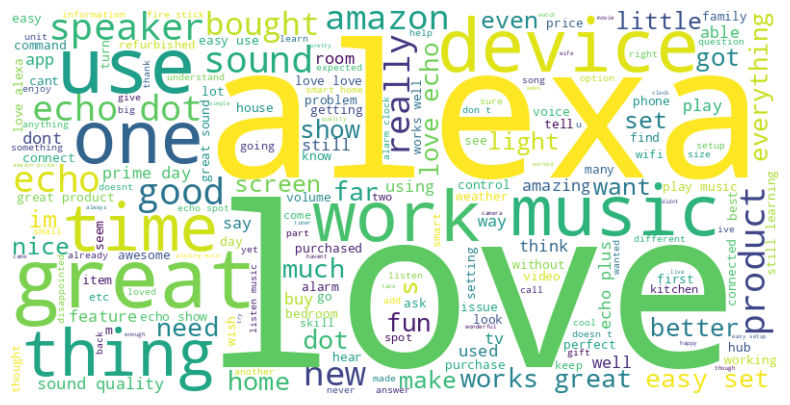

In [17]:
df.head()

df.info()

# Download stopwords if you haven't already
nltk.download('stopwords')

# Step 3: Preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = str(text)
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text


# Apply preprocessing to the review_text column
df['cleaned_text'] = df['verified_reviews'].apply(preprocess_text)
text_combined = ' '.join(df['cleaned_text'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()